In [7]:
using PyPlot
using JuMP, Ipopt

In [8]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimization.jl");
include("../src/plotting.jl");
include("../src/defaults.jl");

include("../src/stochastic_emissions.jl");

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");

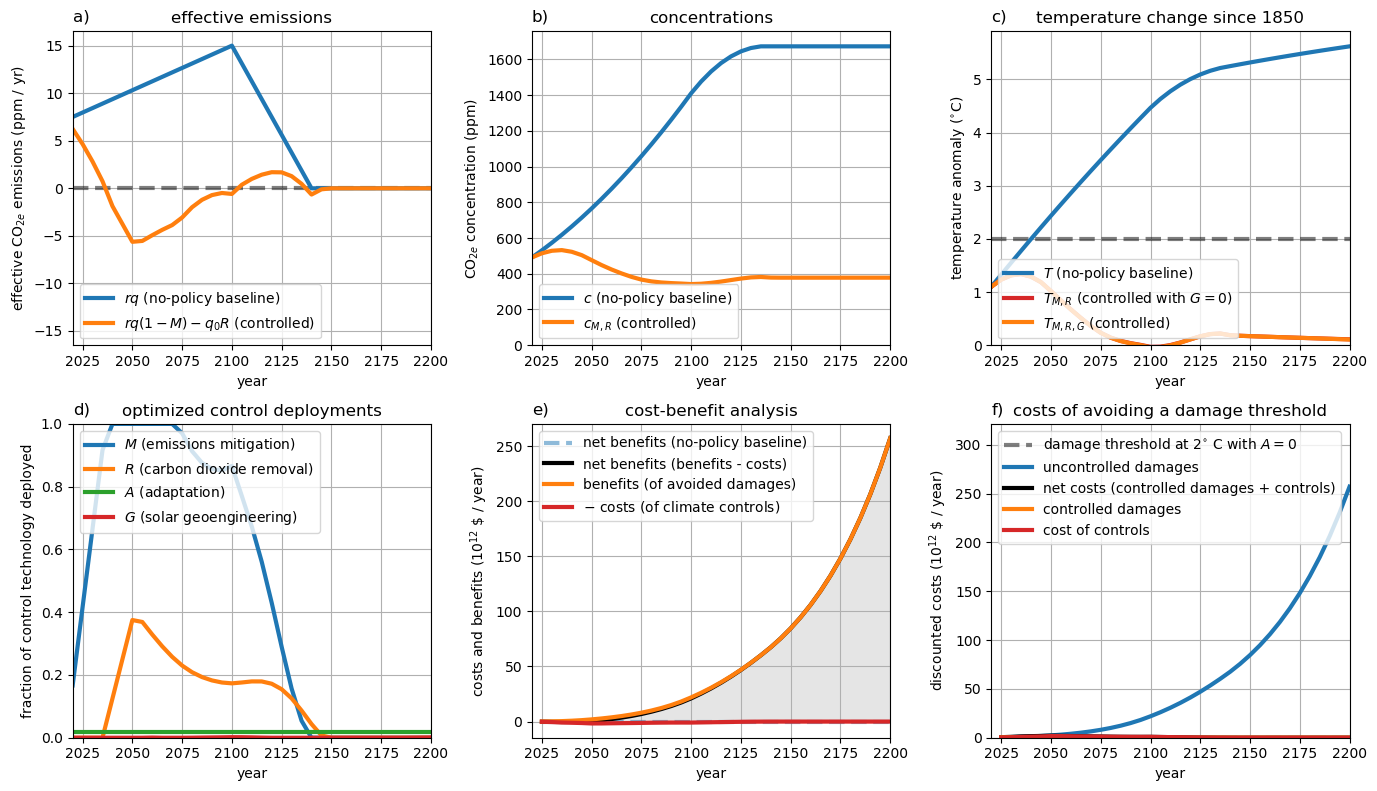

In [9]:
ensemble = Dict()
Δt = 40.

model = ClimateModel();
optimize_controls!(model, obj_option="net_benefit");
ensemble[string(Int64(model.present_year))] = model;
plot_state(model);
savefig("../figures/policy-update-$(Int(model.present_year)).png", bbox_inches="tight", dpi=100)

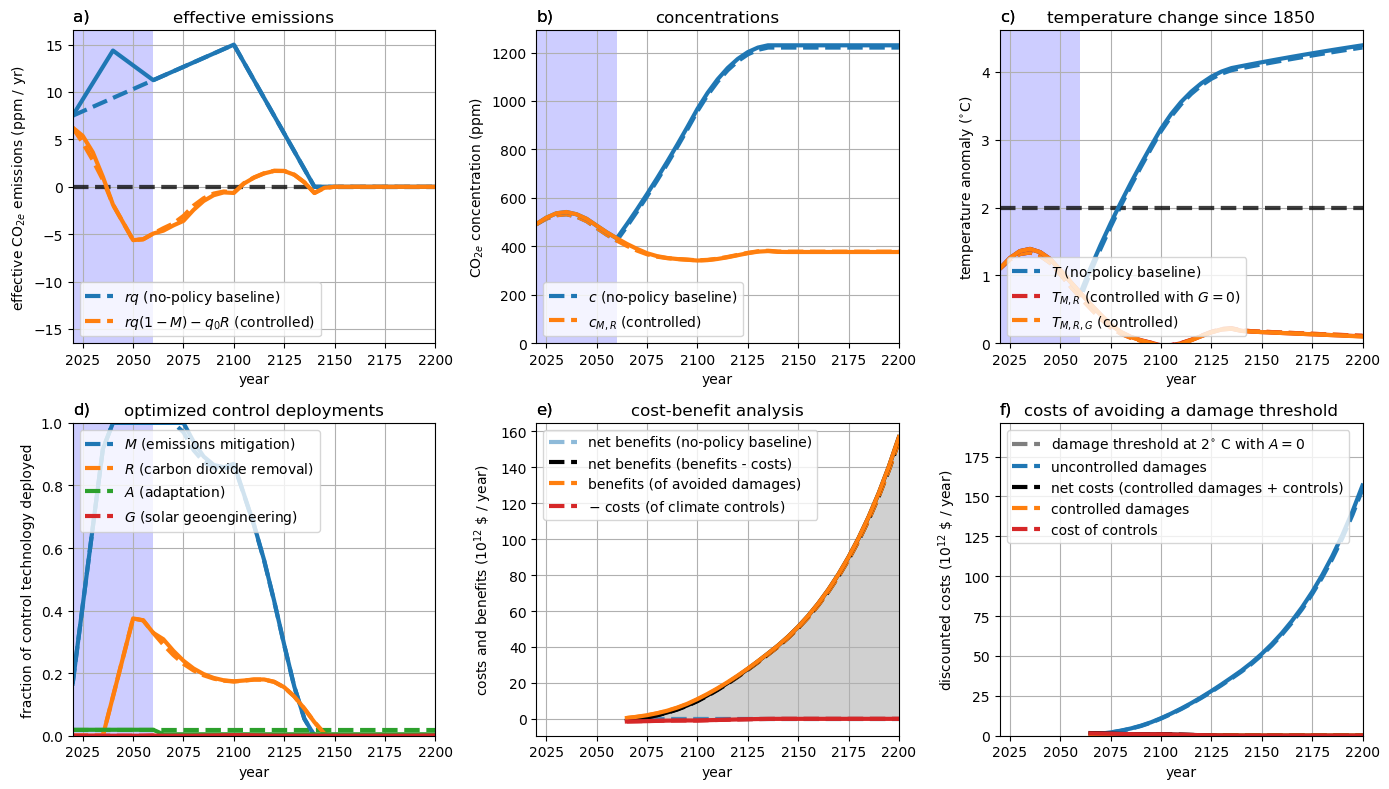

In [10]:
model = add_emissions_bump(model, Δt, 10.)
model = step_forward(model, Δt)

ensemble["2020_stepped"] = step_forward(ensemble["2020"], Δt)
optimize_controls!(model, obj_option="net_benefit");

rcParams["lines.linestyle"] = "--"
plot_state(ensemble["2020_stepped"])
rcParams["lines.linestyle"] = "-"
plot_state(model, new_figure=false, plot_legends=false)
ensemble[model.name] = model;

savefig("../figures/policy-update-$(Int(model.present_year)).png", bbox_inches="tight", dpi=100)